# Trabajo práctico integrador

**Nombre**: Roberto Oscar Axt

## Primera Parte (Clase 1 y 2)

### Primer ejercicio


Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [975]:
import numpy as np
import matplotlib.pyplot as plt

In [976]:
# Definición de norma N, donde N distinto de 0 o inf.
def normaN(matrix:np.array, ord:int):
    rta = []
    for i in matrix:
        sum = 0.0
        for j in i:
            sum += abs(j)**ord
        rta.append(sum**(1/ord))
    return rta

# Definición de norma cero.
def normaCero(matrix:np.array):
    rta = []
    for i in matrix:
        sum = 0.0
        for j in i:
            if j!=0:
                sum += 1
        rta.append(sum)
    return rta

# Definición de norma infinito.
def normaInf(matrix:np.array):
    rta = []
    for i in matrix:
        max = 0.0
        for j in i:
            if abs(j) > max:
                max = abs(j)
        rta.append(max)
    return rta

In [977]:
import numpy.linalg as la

matrix = np.random.randn(3,4)
print(matrix)
print("---------------------------------------------------------------------------------------")
print("Resultado norma orden 0: ", normaCero(matrix))
print("Verificación resultado norma orden 0:", la.norm(matrix, ord=0, axis=1))
print("---------------------------------------------------------------------------------------")
print("Resultado norma orden 1: ", normaN(matrix,1))
print("Verificación resultado norma orden 1:", la.norm(matrix, ord=1, axis=1))
print("---------------------------------------------------------------------------------------")
print("Resultado norma orden 2: ", normaN(matrix,2))
print("Verificación resultado norma orden 2:", la.norm(matrix, ord=2, axis=1))
print("---------------------------------------------------------------------------------------")
print("Resultado norma orden inf: ", normaInf(matrix))
print("Verificación resultado norma orden inf:", la.norm(matrix, ord=np.inf, axis=1))
print("---------------------------------------------------------------------------------------")

[[ 0.94240428  0.07788673 -1.88410577 -0.74929704]
 [ 0.65547923  0.65068267 -0.10758366 -0.4377802 ]
 [ 0.44067813  0.26554165 -0.676606   -0.16476763]]
---------------------------------------------------------------------------------------
Resultado norma orden 0:  [4.0, 4.0, 4.0]
Verificación resultado norma orden 0: [4. 4. 4.]
---------------------------------------------------------------------------------------
Resultado norma orden 1:  [3.6536938186858805, 1.8515257555782758, 1.5475934058690357]
Verificación resultado norma orden 1: [3.65369382 1.85152576 1.54759341]
---------------------------------------------------------------------------------------
Resultado norma orden 2:  [2.237295862145308, 1.027748362997622, 0.8658254037028634]
Verificación resultado norma orden 2: [2.23729586 1.02774836 0.8658254 ]
---------------------------------------------------------------------------------------
Resultado norma orden inf:  [1.8841057670918684, 0.6554792284082761, 0.67660599924315

### Segundo Ejercicio


En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [978]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

In [979]:
TP = np.sum((truth == 1) & (prediction == 1))
TN = np.sum((truth == 0) & (prediction == 0))
FP = np.sum((truth == 0) & (prediction == 1))
FN = np.sum((truth == 1) & (prediction == 0))

Precision =  TP / (TP + FP)
Recall = TP / (TP + FN)
Accuracy = (TP + TN) / (TP + TN + FP + FN)

print("True Positive: ", TP)
print("True False: ", TN)
print("False Positive: ", FP)
print("False Negative: ", FN)
print("---------------------")
print("Precision: ", Precision)
print("Recall: ", Recall)
print("Accuracy: ", Accuracy)


True Positive:  3
True False:  1
False Positive:  3
False Negative:  3
---------------------
Precision:  0.5
Recall:  0.5
Accuracy:  0.4


### Tercer y Cuarto Ejercicio


Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

In [1060]:
import os

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


RANDOM_STATE = 17

#### HAR

In [1061]:
PATH_DATASET = "./HAR"
X_train = np.loadtxt(os.path.join(PATH_DATASET, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DATASET, "y_train.txt")).astype(int)

##### 1.- PCA

In [1062]:
# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=0.8, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)
# Cantidad de componentes necesarios
print("Cantidad de componentes necesarios: ", X_pca.shape[1])

Cantidad de componentes necesarios:  26


##### 2.- Varianza Acumulada

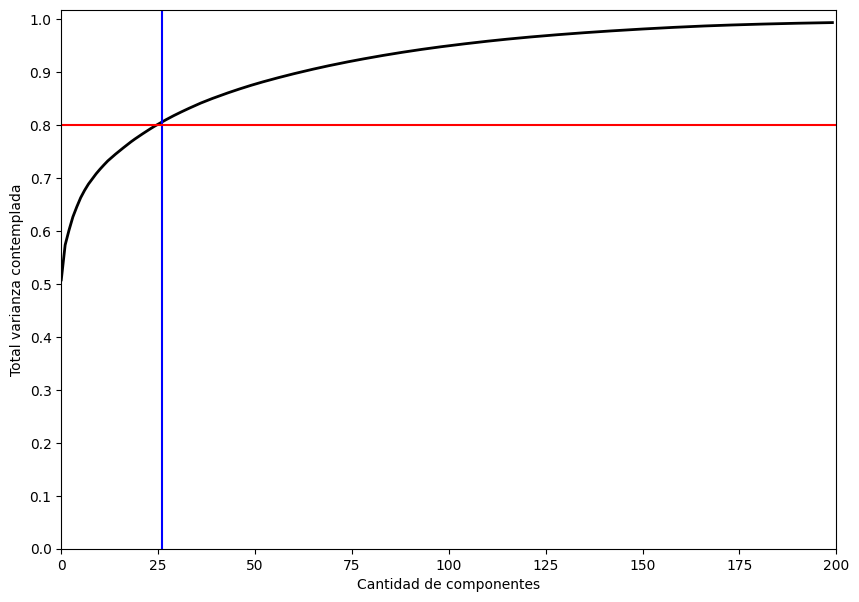

In [1063]:
pca_2 = PCA(n_components=200, random_state=RANDOM_STATE).fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(26, c='b')
plt.axhline(0.8, c='r')
plt.show();

##### 3-4.- [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado y agrupar en clusters de $k=6$ y $k=2$.

In [1064]:
kmeans = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

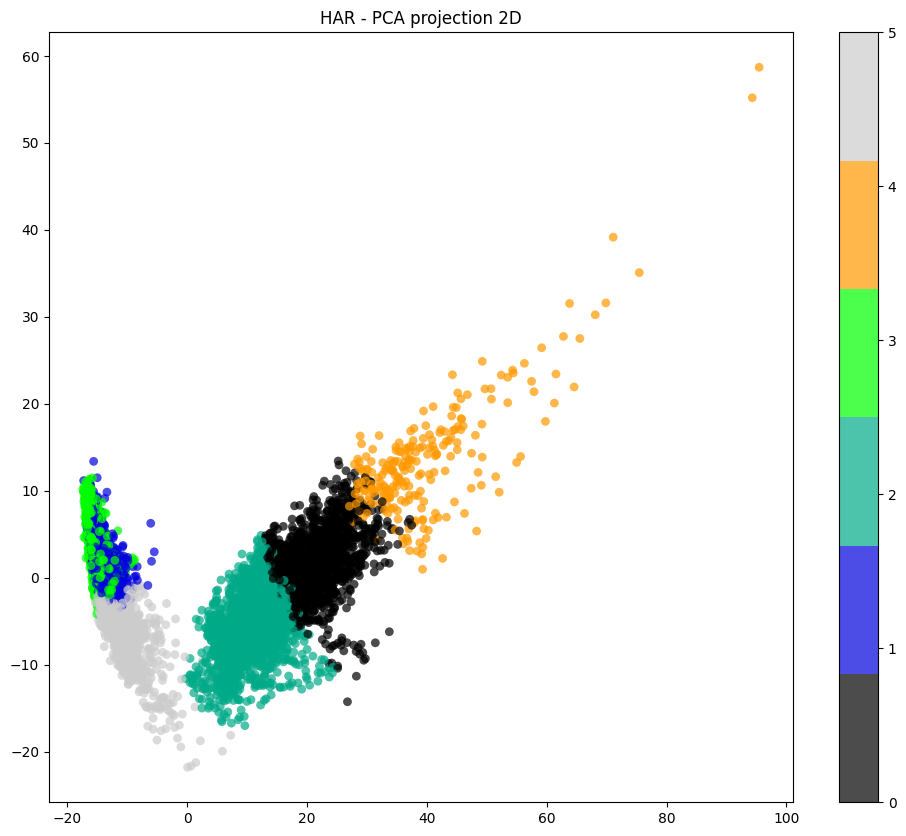

In [1065]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('HAR - PCA projection 2D');

In [1066]:
tab = pd.crosstab(y_train, cluster_labels, margins=True)
tab.index = ['Caminar', 'Subir escaleras', 'Bajar escaleras', 'Estar parado', 'Estar sentado', 'Recostarse', 'Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(6)] + ['Todos']
tab

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,Todos
Caminar,503,0,655,0,68,0,1226
Subir escaleras,207,0,861,0,3,2,1073
Bajar escaleras,622,0,204,0,160,0,986
Estar parado,0,875,1,97,0,313,1286
Estar sentado,0,1003,0,0,0,371,1374
Recostarse,0,24,4,1112,0,267,1407
Todos,1332,1902,1725,1209,231,953,7352


In [1067]:
kmeans_move = KMeans(n_clusters=2, n_init=100, random_state=RANDOM_STATE)
kmeans_move.fit(X_pca)
cluster_labels_mov = kmeans_move.labels_

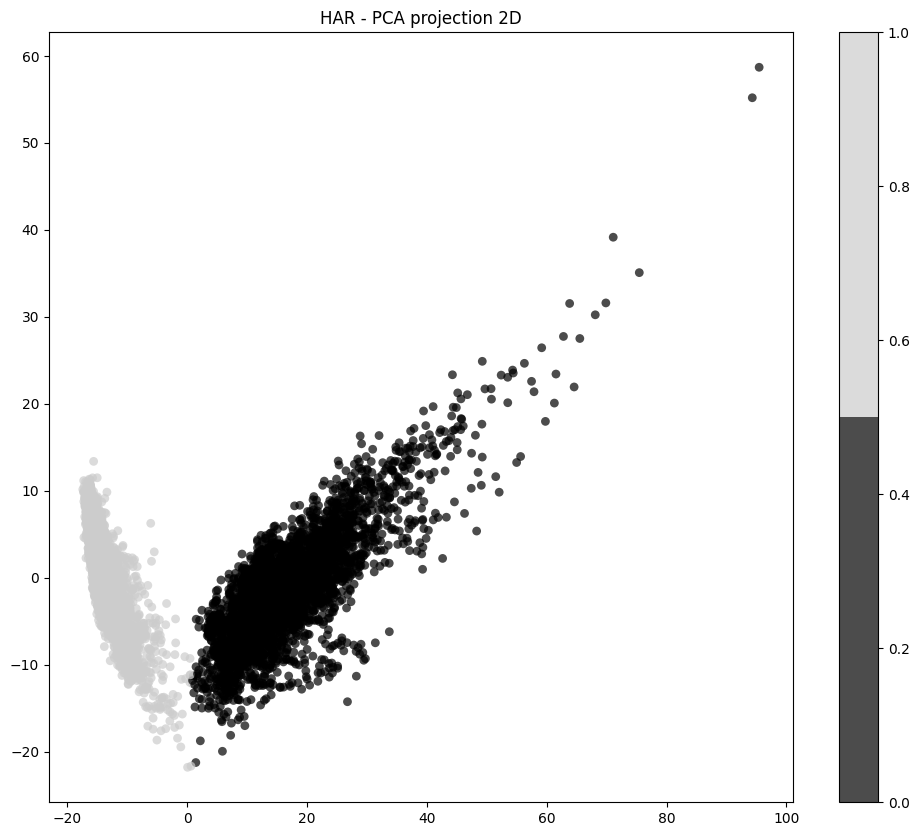

In [1068]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('HAR - PCA projection 2D');

In [1069]:
tab = pd.crosstab(y_train, cluster_labels_mov, margins=True)
tab.index = ['Caminar', 'Subir escaleras', 'Bajar escaleras', 'Estar parado', 'Estar sentado', 'Recostarse', 'Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(2)] + ['Todos']
tab

,cluster 0,cluster 1,Todos
Caminar,1226,0,1226
Subir escaleras,1065,8,1073
Bajar escaleras,986,0,986
Estar parado,1,1285,1286
Estar sentado,0,1374,1374
Recostarse,11,1396,1407
Todos,3289,4063,7352


##### 5.- Conclusiones

PCA permite reducir dimensiones de los datos de entrada. De los 561 dimensiones del dataset original, PCA permite representar el modelo con el 80% de la varianza, solo se requiere analizar 26 features. k-Means es una tecnica de clusterización. Permite simplificar un problema complejo de clasificación como era el caso con k=6 en un problema mas sencillo con k=2. Con k=2 esta separando el dataset en dos situaciones: movimiento o estático.

#### MNIST

(1797, 64)


<Figure size 640x480 with 0 Axes>

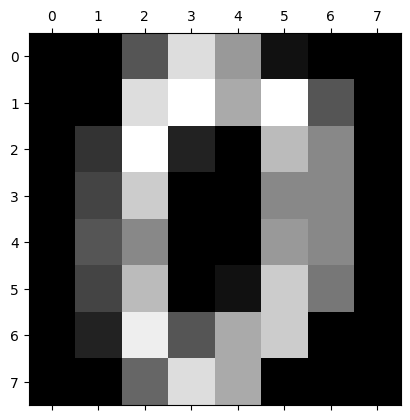

In [1070]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])

plt.show()

X_train, y_train = load_digits(return_X_y=True)

##### 1.- PCA

In [1071]:
# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=0.8, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

# Cantidad de componentes necesarios
print("Cantidad de componentes necesarios: ", X_pca.shape[1])

Cantidad de componentes necesarios:  21


##### 2.- Varianza Acumulada

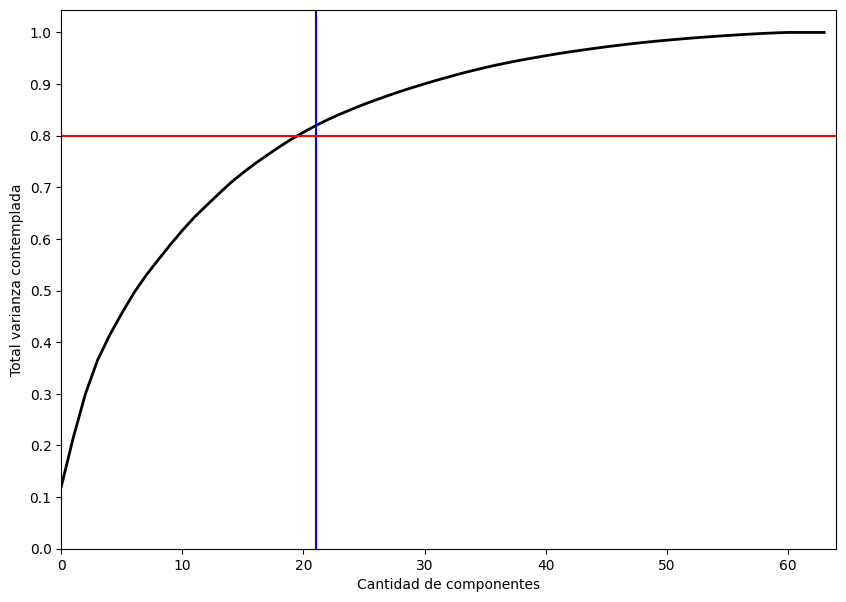

In [1072]:
pca_2 = PCA(n_components=64, random_state=RANDOM_STATE).fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 64)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.8, c='r')
plt.show();

##### 3-4.- [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado y agrupar en clusters de $k=10$ y $k=2$.

In [1073]:
kmeans = KMeans(n_clusters=10, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

Text(0.5, 1.0, 'MNIST - PCA projection 2D')

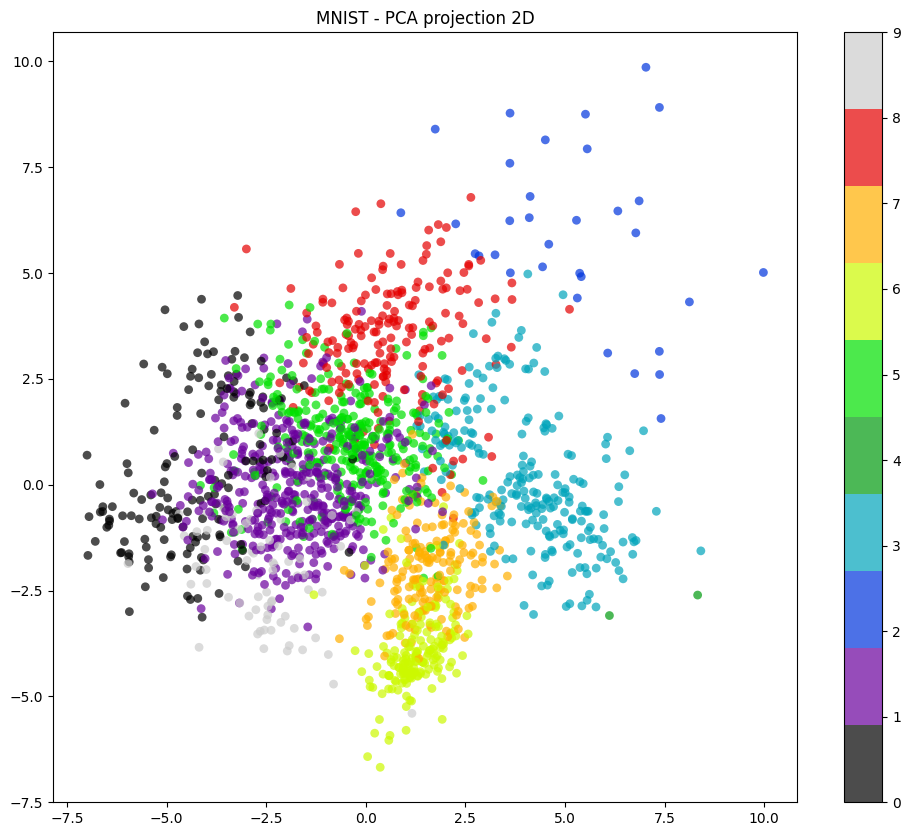

In [1074]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('MNIST - PCA projection 2D')

In [1075]:
tab = pd.crosstab(y_train, cluster_labels, margins=True)
tab.columns = ['cluster ' + str(i + 0) for i in range(10)] + ['Todos']
tab

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,Todos
row_0,,,,,,,,,,,
0,0,0,0,2,0,0,0,176,0,0,178
1,1,1,0,49,0,104,0,0,0,27,182
2,87,4,0,5,1,28,0,0,2,50,177
3,13,152,0,0,0,10,0,0,7,1,183
4,0,0,9,157,2,4,0,0,9,0,181
5,42,71,0,3,0,61,3,0,2,0,182
6,0,0,0,1,0,5,173,1,0,1,181
7,8,0,19,1,0,0,0,0,151,0,179
8,11,48,0,4,0,104,3,0,4,0,174


In [1076]:
kmeans = KMeans(n_clusters=2, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

Text(0.5, 1.0, 'MNIST - PCA projection 2D')

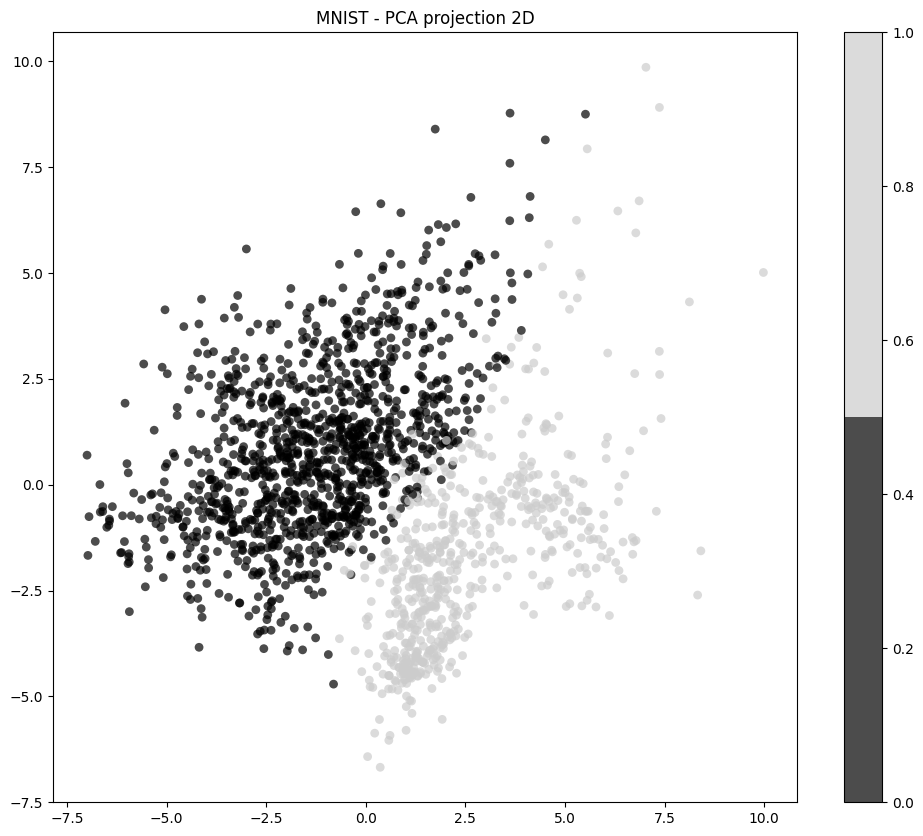

In [1077]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('MNIST - PCA projection 2D')

In [1078]:
tab = pd.crosstab(y_train, cluster_labels, margins=True)
tab.columns = ['cluster ' + str(i + 0) for i in range(2)] + ['Todos']
tab

,cluster 0,cluster 1,Todos
row_0,,,
0,0,178,178
1,174,8,182
2,176,1,177
3,180,3,183
4,5,176,181
5,169,13,182
6,0,181,181
7,166,13,179
8,167,7,174


##### 5.- Conclusiones

En el caso de los números no hay una clara separacion de dataset en una solución binaria, eso se aprecia en el gráfico de la proyección de PCA donde se oberva una nube de puntos.

## Segunda Parte (Clase 3 y 4)

### Funciones para generar la regresión

In [1079]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [1080]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [1081]:
def column_name(df: np.ndarray):
    new_col = []
    i = 0
    for col in df.columns:
        if i ==  len(df.columns) - 1:
            new_col.append("target")
        else :
            new_col.append("feature_" + str(i+1))
        i += 1
    
    df.columns = new_col
    return df

In [1082]:
df = pd.DataFrame(new_data)

df = column_name(df)

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


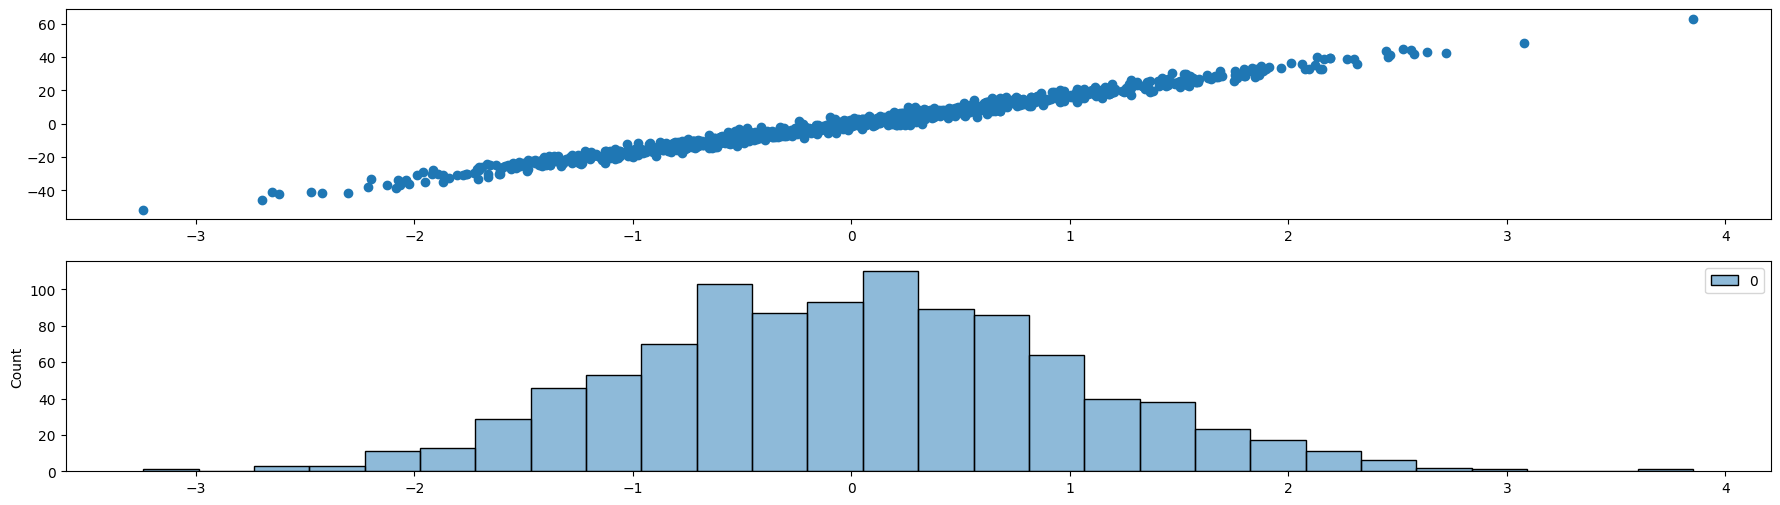

In [1083]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [1084]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [1085]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

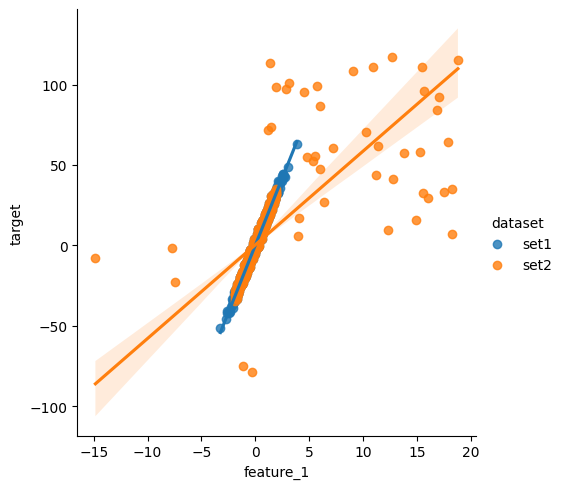

In [1086]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio



Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [1087]:
def split(df: pd.DataFrame):
    samples = df.shape[0] # cuantas muestras tiene el dataframe
    indexes = np.random.permutation(np.arange(0, samples)) # genero un array con los indices y permuto su ubicación

    train_idx = indexes[0:int(0.7*samples)] # los primeros 70% corresponderan a training
    val_idx = indexes[int(0.7*samples): int(0.9*samples)] # los 20% del medio corresponderan a validation
    test_idx = indexes[int(0.9*samples):] # el 10% restante corresponderan a test

    X_train = df.iloc[train_idx,:-1] # todas las columnas excepto la última son las propiedades del dataframe de training
    Y_train = df.iloc[train_idx,-1:] # la úlitma columna es el target de training
    X_val = df.iloc[val_idx,:-1] # todas las columnas excepto la última son las propiedades del dataframe de validation
    Y_val = df.iloc[val_idx,-1:] # la úlitma columna es el target de validation
    X_test =  df.iloc[test_idx,:-1] # todas las columnas excepto la última son las propiedades del dataframe de test
    Y_test = df.iloc[test_idx,-1:] # la úlitma columna es el target de test
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [1088]:
# Verificación

dataset = np.arange(100).reshape((10,10))
dataset  = pd.DataFrame(dataset)

X_train, X_val, X_test, Y_train, Y_val, Y_test = split(dataset)
print("X_TRAIN\n", X_train)
print("Y_TRAIN\n",Y_train)
print("------------------------------")
print("X_VALIDATION\n", X_val)
print("Y_VALIDATION\n",Y_val)
print("------------------------------")
print("X_TEST\n", X_test)
print("Y_TEST\n",Y_test)


X_TRAIN
     0   1   2   3   4   5   6   7   8
1  10  11  12  13  14  15  16  17  18
2  20  21  22  23  24  25  26  27  28
4  40  41  42  43  44  45  46  47  48
5  50  51  52  53  54  55  56  57  58
7  70  71  72  73  74  75  76  77  78
3  30  31  32  33  34  35  36  37  38
8  80  81  82  83  84  85  86  87  88
Y_TRAIN
     9
1  19
2  29
4  49
5  59
7  79
3  39
8  89
------------------------------
X_VALIDATION
     0   1   2   3   4   5   6   7   8
6  60  61  62  63  64  65  66  67  68
0   0   1   2   3   4   5   6   7   8
Y_VALIDATION
     9
6  69
0   9
------------------------------
X_TEST
     0   1   2   3   4   5   6   7   8
9  90  91  92  93  94  95  96  97  98
Y_TEST
     9
9  99


### Sexto ejercicio



Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generar datasets:
    - Uno normal con poco `noise` y pocos outliers
    - Uno con mucho `noise` y pocos outliers
    - Uno con poco `noise` y muchos outliers
    - Uno con mucho `noise` y muchos outliers
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Comparar y analizar resultados.

#### 1.-Generación de las regresiones y spliteo de datasets

In [1089]:
# Creamos un dataset de prueba
## Utilicen mas `n_features` > 1 y n_informative mas o menos la mitad de n_features
X, y = make_regression(n_samples = 1000, n_features = 10, noise = 50, n_informative = 5,  random_state = 42)
noisy_data = np.append(X,y.reshape(-1,1),axis=1)
X, y = make_regression(n_samples = 1000, n_features = 10, noise = 1, n_informative = 5,  random_state = 42)
normal_data = np.append(X,y.reshape(-1,1),axis=1)

df_noisy  = pd.DataFrame(noisy_data)
df_normal = pd.DataFrame(normal_data)

df_noisy = column_name(df_noisy)
df_normal = column_name(df_normal)


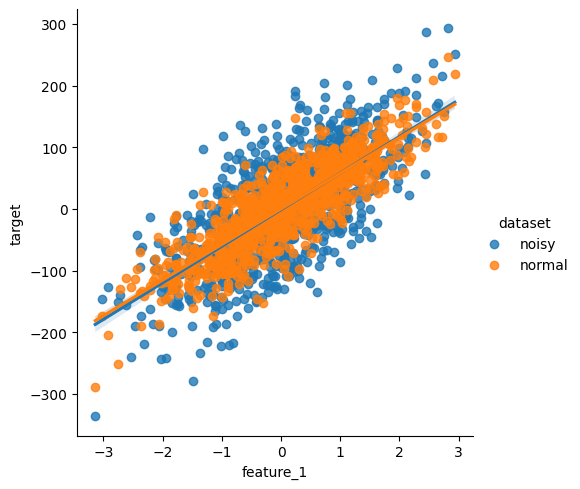

In [1090]:
sns.lmplot(data = pd.concat([df_noisy.assign(dataset = 'noisy'),
                                 df_normal.assign(dataset = 'normal')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

In [1091]:
df_noisy_few_outlier = generate_outliers(df_noisy,['feature_1'], percentage = 0.01, extreme_outlier = False, two_tailed= True)
df_noisy_with_outlier = generate_outliers(df_noisy,['feature_1'], percentage = 1, extreme_outlier = False, two_tailed= True)
df_normal_few_outlier = generate_outliers(df_normal,['feature_1'], percentage = 0.01, extreme_outlier = False, two_tailed= True)
df_normal_with_outlier = generate_outliers(df_normal,['feature_1'], percentage = 1, extreme_outlier = False, two_tailed= True)

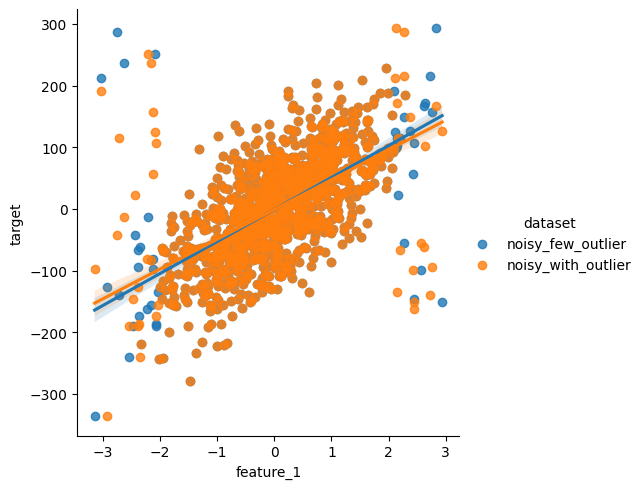

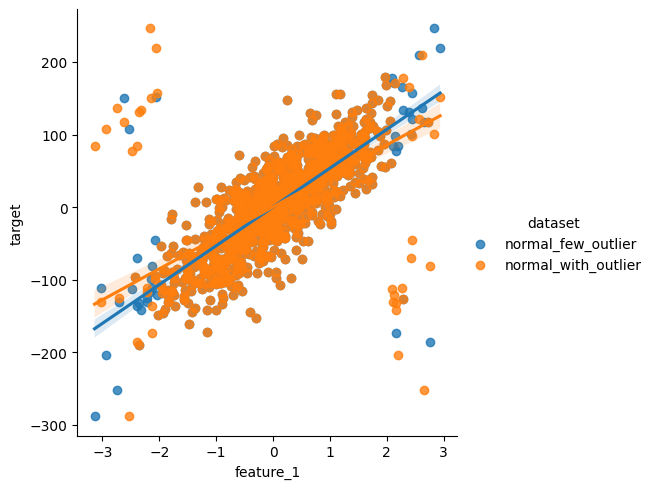

In [1092]:
sns.lmplot(data = pd.concat([df_noisy_few_outlier.assign(dataset = 'noisy_few_outlier'),
                             df_noisy_with_outlier.assign(dataset = 'noisy_with_outlier')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

sns.lmplot(data = pd.concat([df_normal_few_outlier.assign(dataset = 'normal_few_outlier'),
                             df_normal_with_outlier.assign(dataset = 'normal_with_outlier')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

In [1093]:
from sklearn.linear_model import LinearRegression, HuberRegressor,ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")


In [1094]:
# División de los datos en train y test

#X_train, X_val, X_test, y_train, Y_val, y_test = split(df_normal_few_outlier)
#X_train, X_val, X_test, y_train, Y_val, y_test = split(df_normal_with_outlier)
#X_train, X_val, X_test, y_train, Y_val, y_test = split(df_noisy_few_outlier)
#X_train, X_val, X_test, y_train, Y_val, y_test = split(df_noisy_with_outlier)

X = df_noisy_with_outlier.drop(columns='target')
y = df_noisy_with_outlier['target']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

#### 2.- Regresiones

##### LinearRegresion 

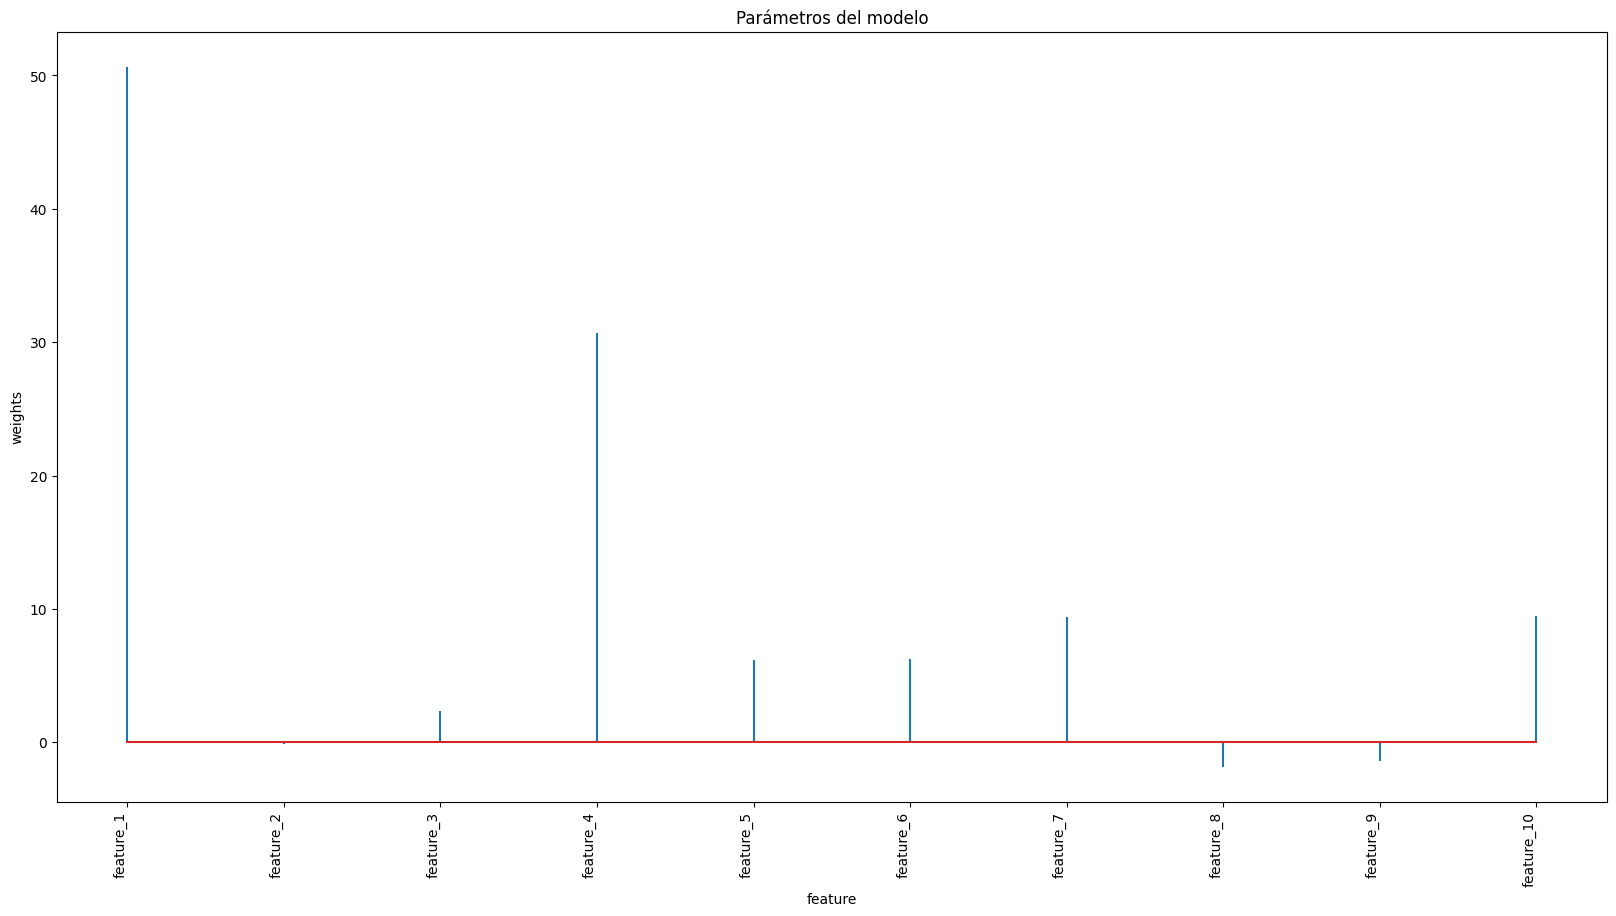

In [1095]:
modelo = make_pipeline(StandardScaler(with_mean=True), LinearRegression())
modelo.fit(X= X_train, y = y_train)
modelo.steps[1][1].n_features_in_
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.steps[1][1].coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');


In [1096]:
# Predicciones test

predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([  -3.144936  ,   49.53516574,  -52.59665677,  120.4173611 ,
        -52.8522573 ,  -29.37629226,  -41.21642629,  -17.47934616,
       -110.41918127,  -49.33944576])

In [1097]:
# Error de test del modelo. Uso rmse para mantener la misma escala que la variable a predecir

rmse_lr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )

print(f"El error (rmse) de test es: {rmse_lr}")

El error (rmse) de test es: 68.8865833384229


In [1098]:
R2_lr = metrics.r2_score(y_test, predicciones)
print(R2_lr)

0.4248191095859095


##### HuberRegressor

In [1099]:
huber = HuberRegressor().fit(X= X_train, y = y_train)
predicciones = huber.predict(X=X_test)

In [1100]:
# Error de test del modelo. Uso rmse para mantener la misma escala que la variable a predecir

rmse_hub = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )

print(f"El error (rmse) de test es: {rmse_hub}")

El error (rmse) de test es: 69.317254223047


In [1101]:
R2_hub = metrics.r2_score(y_test, predicciones)
print(R2_hub)

0.4176047003550948


##### ElasticNetCV

In [1102]:
modelo = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train.flatten())

In [1103]:
# Predicciones test

predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

In [1104]:
# Error de test del modelo 

rmse_elastic = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
               )
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 68.628920760422


In [1105]:
R2_elastic = metrics.r2_score(y_test, predicciones)
print(R2_elastic)

0.42911386238812654


#### 3.- Comparaciones

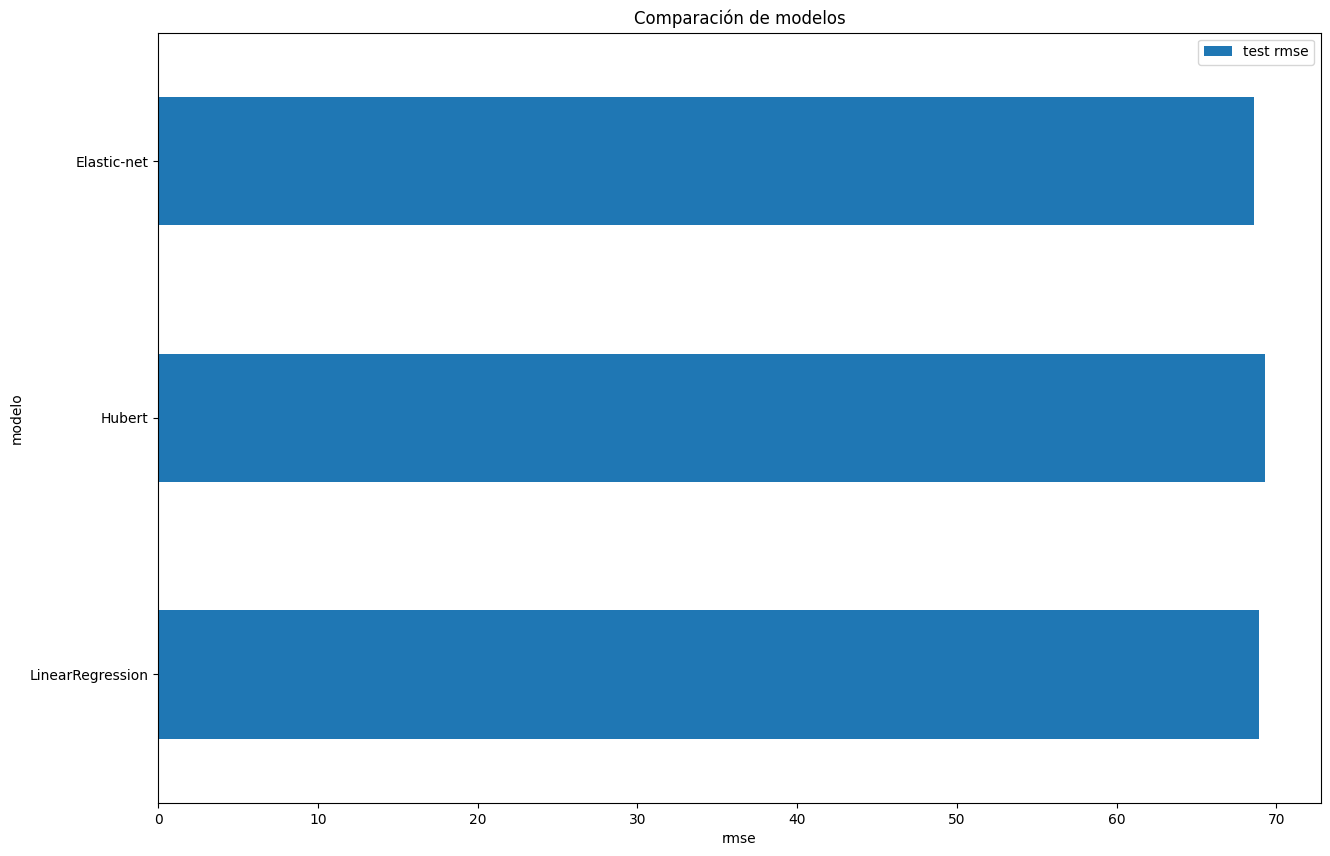

In [1106]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'Hubert', 'Elastic-net'],
                    'test rmse': [rmse_lr, rmse_hub, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

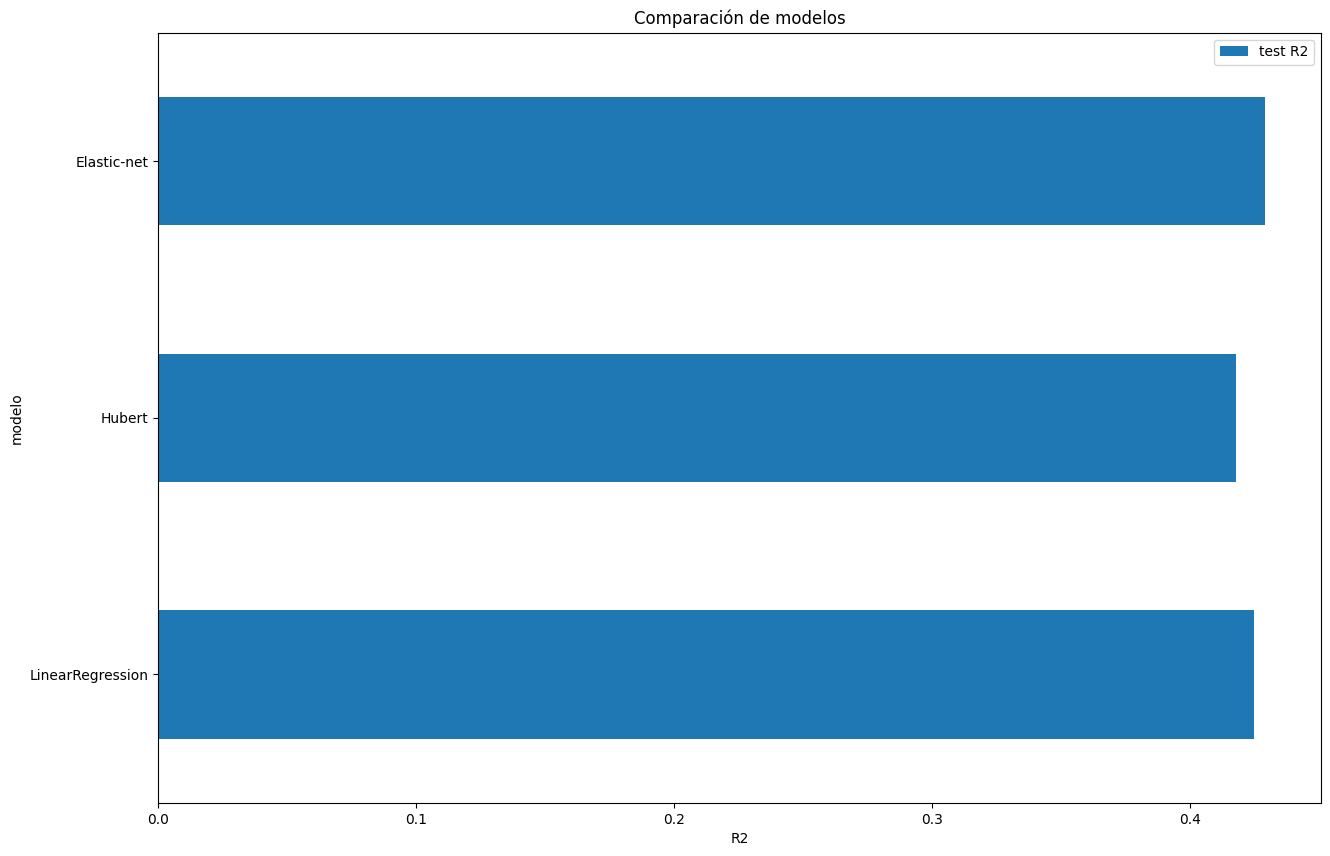

In [1107]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'Hubert', 'Elastic-net'],
                    'test R2': [R2_lr, R2_hub, R2_elastic]
                 })

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('R2')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`